In [20]:
import pandas as pd
import os, warnings, matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


warnings.filterwarnings('ignore')
plt.style.use('ggplot')

font_location = 'C:/Windows/Fonts/H2GTRM.TTF'
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font', family=font_name)

In [12]:
url = 'UseData/SmartFarm/'
files = os.listdir(url)
# files

In [7]:
df = pd.read_excel(url + files[0], sheet_name='Sheet 1')
df.head()

,시설ID,농가명,시도,시군구,품목명,품종,재배면적,시설유형,재배형태,단동/연동 구분,...,주차,초장,엽장,엽폭,엽병장,엽수,관부직경,화방 꽃수(소화수),착과수,최종화방차수
0,PF_0020688_01,문*,경기도,화성시,딸기,금실,2376,비닐,수경,연동,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PF_0020688_01,문*,경기도,화성시,딸기,금실,2376,비닐,수경,연동,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PF_0020688_01,문*,경기도,화성시,딸기,금실,2376,비닐,수경,연동,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PF_0020688_01,문*,경기도,화성시,딸기,금실,2376,비닐,수경,연동,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PF_0020688_01,문*,경기도,화성시,딸기,금실,2376,비닐,수경,연동,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
len(df.columns)

84

In [27]:
# 타겟 변수
target_col = ['조사일', '주차', '초장', '엽장', '엽폭', '엽병장', 
              '엽수', '관부직경', '화방 꽃수(소화수)', '착과수', '최종화방차수']

# 독립 변수 (결측치 95% 이상인 것 제외)
# 텍스트 파일 참조
X_col = ['좌측일중천창 개도', '외부강우', '외부온도', '좌측일중측창 설정온도', '우측일중천창 개도', '좌측일중측창 온도폭' , 
         '우측일중측창 설정온도', '좌측일중천창 온도폭', '외부풍향', '좌측일중천창 설정온도', '우측일중천창 설정온도',
         '내부습도', '내부온도', '우측일중천창 온도폭', '수집일', '우측일중측창 개도', '좌측일중측창 개도', '외부풍속',
         '우측일중측창 온도폭', '외부습도']

X_col.sort()
X_col

['내부습도',
 '내부온도',
 '수집일',
 '외부강우',
 '외부습도',
 '외부온도',
 '외부풍속',
 '외부풍향',
 '우측일중천창 개도',
 '우측일중천창 설정온도',
 '우측일중천창 온도폭',
 '우측일중측창 개도',
 '우측일중측창 설정온도',
 '우측일중측창 온도폭',
 '좌측일중천창 개도',
 '좌측일중천창 설정온도',
 '좌측일중천창 온도폭',
 '좌측일중측창 개도',
 '좌측일중측창 설정온도',
 '좌측일중측창 온도폭']

    이 부분 어떻게 함수화 해서 편하게 불러올 수 있지 않을까?

In [10]:
df[X_col].describe()

,내부습도,내부온도,외부강우,외부습도,외부온도,외부풍속,외부풍향,우측일중천창 개도,우측일중천창 설정온도,우측일중천창 온도폭,우측일중측창 개도,우측일중측창 설정온도,우측일중측창 온도폭,좌측일중천창 개도,좌측일중천창 설정온도,좌측일중천창 온도폭,좌측일중측창 개도,좌측일중측창 설정온도,좌측일중측창 온도폭
count,3061.000000,3061.000000,3060.000000,3060.000000,3530.000000,3060.000000,3060.000000,2944.000000,2926.000000,2917.0,2957.000000,2930.000000,2917.0,2935.000000,2926.000000,2917.0,2947.000000,2930.000000,2917.0
mean,68.248487,19.221447,0.945196,79.169154,11.610031,1.046428,190.616791,20.557813,9.819699,9.0,39.655276,9.199498,9.0,20.553833,9.822382,9.0,35.062168,9.179696,9.0
std,18.003992,5.157218,0.196780,19.063016,8.493683,1.066890,85.680473,33.027686,2.252892,0.0,41.836354,1.085007,0.0,32.988029,2.257884,0.0,40.956706,1.040469,0.0
min,17.500000,9.000000,0.000000,15.500000,-11.750000,0.000000,1.000000,0.000000,9.000000,9.0,0.000000,9.000000,9.0,0.000000,9.000000,9.0,0.000000,9.000000,9.0
25%,55.670000,15.000000,1.000000,63.647500,5.270000,0.080000,121.060000,0.000000,9.000000,9.0,0.000000,9.000000,9.0,0.000000,9.000000,9.0,0.000000,9.000000,9.0
50%,75.500000,18.920000,1.000000,89.580000,12.000000,0.830000,199.420000,0.000000,9.000000,9.0,24.860000,9.000000,9.0,0.000000,9.000000,9.0,0.000000,9.000000,9.0
75%,82.000000,23.080000,1.000000,95.000000,18.330000,1.580000,265.710000,40.000000,9.000000,9.0,80.000000,9.000000,9.0,38.915000,9.000000,9.0,73.000000,9.000000,9.0
max,92.000000,35.750000,1.000000,95.000000,34.000000,6.250000,339.000000,100.000000,18.000000,9.0,100.000000,18.000000,9.0,100.000000,18.000000,9.0,100.000000,18.000000,9.0


In [28]:
for i in range(len(target_col)):
    X_col.append(target_col[i])
X_col

['내부습도',
 '내부온도',
 '수집일',
 '외부강우',
 '외부습도',
 '외부온도',
 '외부풍속',
 '외부풍향',
 '우측일중천창 개도',
 '우측일중천창 설정온도',
 '우측일중천창 온도폭',
 '우측일중측창 개도',
 '우측일중측창 설정온도',
 '우측일중측창 온도폭',
 '좌측일중천창 개도',
 '좌측일중천창 설정온도',
 '좌측일중천창 온도폭',
 '좌측일중측창 개도',
 '좌측일중측창 설정온도',
 '좌측일중측창 온도폭',
 '조사일',
 '주차',
 '초장',
 '엽장',
 '엽폭',
 '엽병장',
 '엽수',
 '관부직경',
 '화방 꽃수(소화수)',
 '착과수',
 '최종화방차수']

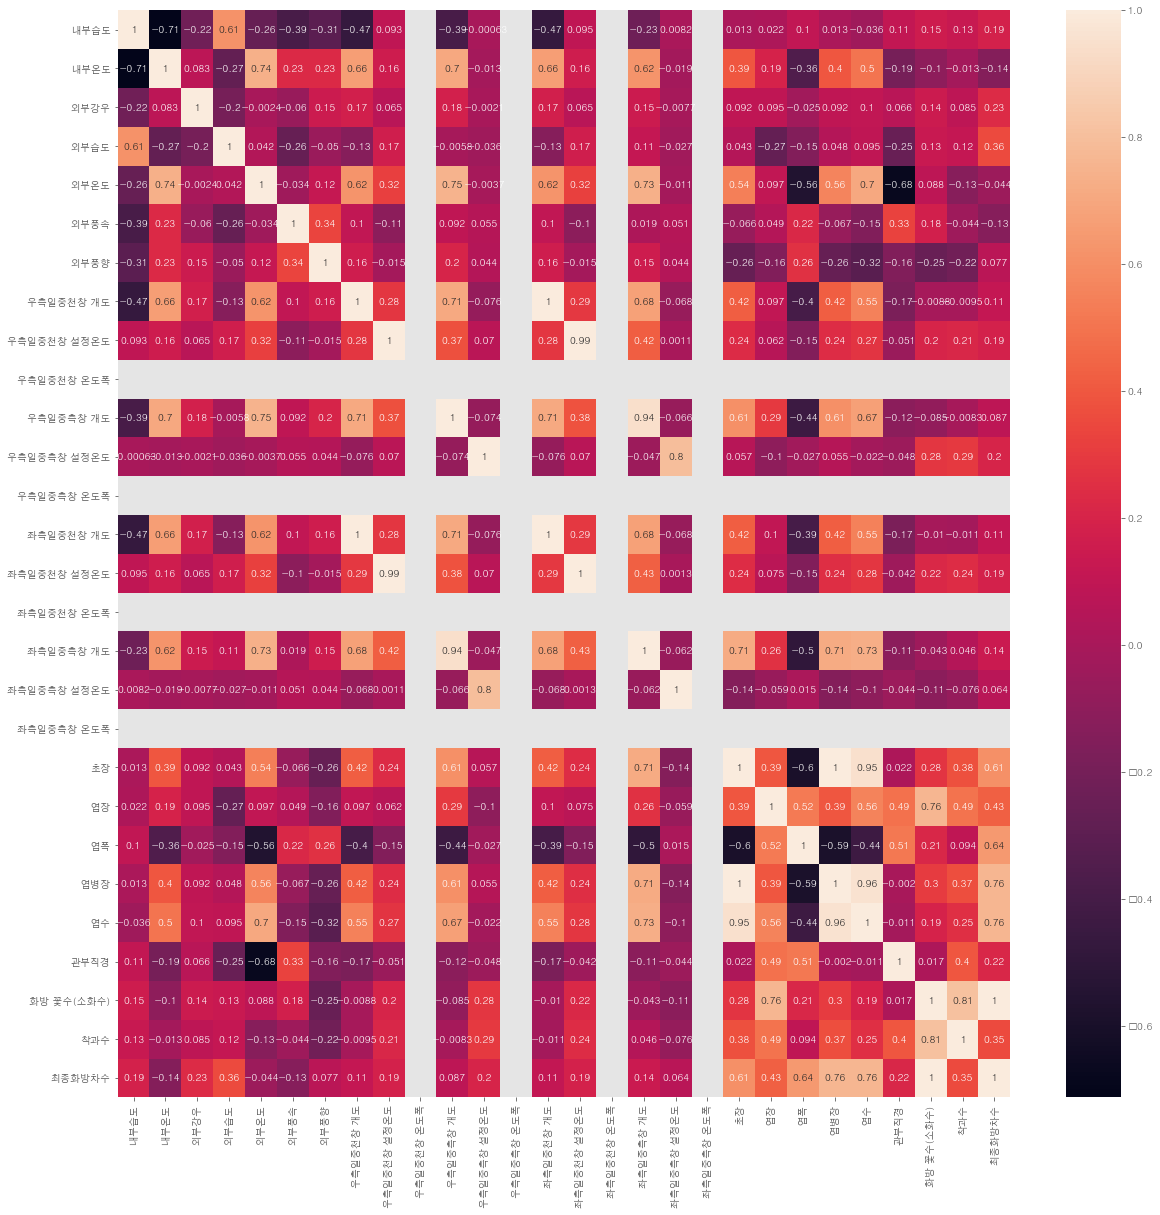

In [29]:
plt.figure(figsize=(20, 20))
# heatMap = sns.heatmap(data=df[sorted(X_col+target_col)].corr(), annot=True) #, cmap='Blues')
heatMap = sns.heatmap(data=df[X_col].corr(), annot=True) 
plt.show()

In [11]:
df[X_col].isnull().sum()

내부습도           472
내부온도           472
수집일              0
외부강우           473
외부습도           473
외부온도             3
외부풍속           473
외부풍향           473
우측일중천창 개도      589
우측일중천창 설정온도    607
우측일중천창 온도폭     616
우측일중측창 개도      576
우측일중측창 설정온도    603
우측일중측창 온도폭     616
좌측일중천창 개도      598
좌측일중천창 설정온도    607
좌측일중천창 온도폭     616
좌측일중측창 개도      586
좌측일중측창 설정온도    603
좌측일중측창 온도폭     616
dtype: int64